In [ ]:
#takes from the "slumlords" zip file, looks as specifically the "FAMILYTIE_FIG3" data

In [38]:
from io import BytesIO
from zipfile import ZipFile
import networkx as nx
import pandas as pd

In [39]:
with ZipFile('slumlords.zip', 'r') as zipObj:
   zipObj.extractall()

In [40]:
slumfile = pd.read_csv('FAMILYTIE_FIG3.csv')

In [41]:
slumfile

,Unnamed: 0,Andre,Beverly,Ed,Carol,Diane,Garth,Fred,Ike,Jane,Lee,Kate
0,Andre,0,1,0,1,1,0,0,0,0,0,0
1,Beverly,1,0,1,0,0,1,0,0,0,0,0
2,Ed,0,1,0,0,1,1,0,0,0,0,0
3,Carol,1,0,0,0,1,0,1,0,0,0,0
4,Diane,1,0,1,1,0,1,1,0,0,0,0
5,Garth,0,0,1,0,1,0,1,0,0,0,0
6,Fred,0,0,0,1,1,1,0,0,0,0,0
7,Ike,0,0,0,0,0,0,0,0,1,0,1
8,Jane,0,0,0,0,0,0,0,1,0,1,0
9,Lee,0,0,0,0,0,0,0,0,1,0,1


In [42]:
fam_tie = nx.Graph()

In [53]:
fam_tie.add_edge('Andre' , 'Beverly')
fam_tie.add_edge('Andre' , 'Diane')
fam_tie.add_edge('Andre' , 'Carol')
fam_tie.add_edge('Beverly' , 'Ed')
fam_tie.add_edge('Beverly' , 'Garth')
fam_tie.add_edge('Ed' , 'Diane')
fam_tie.add_edge('Ed' , 'Garth')
fam_tie.add_edge('Carol' , 'Diane')
fam_tie.add_edge('Carol' , 'Fred')
fam_tie.add_edge('Diane' , 'Garth')
fam_tie.add_edge('Diane' , 'Fred')
fam_tie.add_edge('Garth' , 'Fred')
fam_tie.add_edge('Ike' , 'Kate')
fam_tie.add_edge('Ike' , 'Jane')
fam_tie.add_edge('Jane' , 'Lee')
fam_tie.add_edge('Lee' , 'Kate')

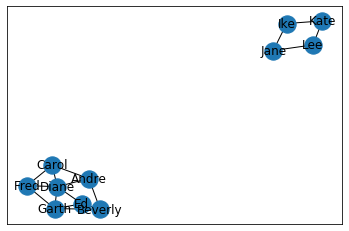

In [54]:
nx.draw_networkx(fam_tie)

In [55]:
nx.degree(fam_tie)

DegreeView({'Andre': 3, 'Beverly': 3, 'Diane': 5, 'Carol': 3, 'Ed': 3, 'Garth': 4, 'Fred': 3, 'Ike': 2, 'Kate': 2, 'Jane': 2, 'Lee': 2})

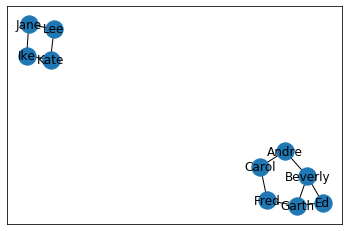

In [56]:
#based on the above degrees, Diane is the most "vital" to this group
#if you were to remove Diane:
    #the Jane, Lee, Kate, and Ike group would have no effect
    #but the carol, Fred, Garth, Ed, Beverly, Andre grou pwould be effected
    #Diane would neither be the center of the group, and the "shortest path"
    #for the majority of those connections would be a lot longer, without going through Diane
fam_tie2 = nx.Graph()
fam_tie2.add_edge('Andre' , 'Beverly')
fam_tie2.add_edge('Andre' , 'Carol')
fam_tie2.add_edge('Beverly' , 'Ed')
fam_tie2.add_edge('Beverly' , 'Garth')
fam_tie2.add_edge('Ed' , 'Garth')
fam_tie2.add_edge('Carol' , 'Fred')
fam_tie2.add_edge('Garth' , 'Fred')
fam_tie2.add_edge('Ike' , 'Kate')
fam_tie2.add_edge('Ike' , 'Jane')
fam_tie2.add_edge('Jane' , 'Lee')
fam_tie2.add_edge('Lee' , 'Kate')

nx.draw_networkx(fam_tie2)

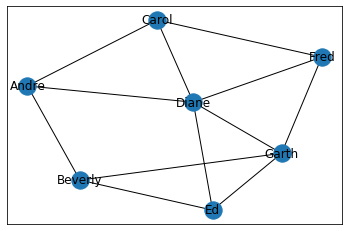

In [57]:
#STRONGEST LINK = DIANE
#WEAKEST LINK = IKE, KATE, LEE, JANE
    #for instance, if you take Ike and Lee out, then Kate and Jane have no connections whatsoever
    #same goes if you take Kate and Jane out, then Ike and Lee are without any connections
    
#weakest link observed: (when removing Ike and Lee)
weak = nx.Graph()
weak.add_edge('Andre' , 'Beverly')
weak.add_edge('Andre' , 'Diane')
weak.add_edge('Andre' , 'Carol')
weak.add_edge('Beverly' , 'Ed')
weak.add_edge('Beverly' , 'Garth')
weak.add_edge('Ed' , 'Diane')
weak.add_edge('Ed' , 'Garth')
weak.add_edge('Carol' , 'Diane')
weak.add_edge('Carol' , 'Fred')
weak.add_edge('Diane' , 'Garth')
weak.add_edge('Diane' , 'Fred')
weak.add_edge('Garth' , 'Fred')
nx.draw_networkx(weak)

#this below shows that when you remove Ike and Lee and all of their connections,
#Kate and Jane have no connections to anything and therefore are 
#essentially non-existent in the network